<a href="https://colab.research.google.com/github/Upendra4204/Upendra4204/blob/main/creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving UniversalBank.csv to UniversalBank.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
data=pd.read_csv('UniversalBank.csv')
df=pd.DataFrame(data)
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<Axes: >

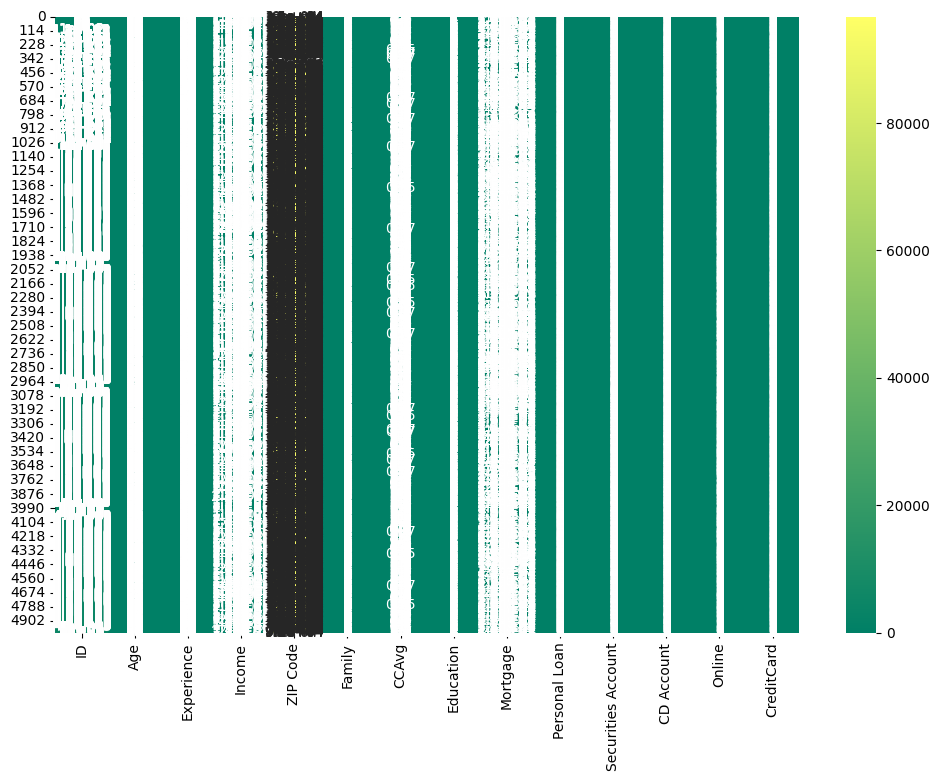

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df,annot=True,cmap='summer')

In [ ]:
correlations = df.corr()['CreditCard'].abs()

# Set the correlation threshold
threshold = 0.001

# Filter features with correlation above the threshold
selected_features = correlations[correlations >= threshold].index

# Create a new DataFrame with selected features
new_df = df[selected_features]

# Display the new DataFrame
print(new_df)

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0            

In [ ]:
def remove_outliers(df, CreditCard):
    # Calculate the 20th and 80th percentiles
    lower_bound = df[CreditCard].quantile(0.2)
    upper_bound = df[CreditCard].quantile(0.8)

    # Remove rows with values below 20th percentile and above 80th percentile
    filtered_df = df[(df[CreditCard] >= lower_bound) & (df[CreditCard] <= upper_bound)]

    return filtered_df

# Call the function and assign the result to a variable named 'filtered_data'
filtered_data = remove_outliers(df, 'CreditCard')

# Print the resulting DataFrame
print(filtered_data)

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0            

In [ ]:
df=df.drop(['ID','ZIP Code'],axis=1)

In [ ]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [ ]:
df['CreditCard'].value_counts(normalize=True)

0    0.706
1    0.294
Name: CreditCard, dtype: float64

In [ ]:
X=df.drop(['CreditCard'],axis=1)
y=df['CreditCard']

df1=np.log1p(X)
df=pd.concat([df1,y],axis=1)
df


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0.895607,0.87437,0.952309,0.672503,0.513214,0.423036,0.000000,0.423036,0.0,0.000000,0
1,0.945681,0.87437,0.922790,0.625800,0.501012,0.423036,0.000000,0.423036,0.0,0.000000,0
2,0.934207,0.87437,0.810237,0.423036,0.423036,0.423036,0.000000,0.000000,0.0,0.000000,0
3,0.925237,0.87437,1.002638,0.423036,0.607875,0.554618,0.000000,0.000000,0.0,0.000000,0
4,0.925237,0.87437,0.945681,0.672503,0.423036,0.554618,0.000000,0.000000,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,0.909015,0.87437,0.936268,0.423036,0.545221,0.625800,0.000000,0.000000,0.0,0.423036,0
4996,0.912001,0.87437,0.844907,0.672503,0.254668,0.423036,0.991922,0.000000,0.0,0.423036,0
4997,0.971052,0.87437,0.891821,0.554618,0.209439,0.625800,0.000000,0.000000,0.0,0.000000,0
4998,0.973301,0.87437,0.952309,0.625800,0.292944,0.554618,0.000000,0.000000,0.0,0.423036,0


In [ ]:
df['Personal Loan'].value_counts(normalize=True)

0.000000    0.904
0.693147    0.096
Name: Personal Loan, dtype: float64

In [ ]:
df['Mortgage'].value_counts(normalize=True)

0.000000    0.6924
4.595120    0.0034
4.787492    0.0032
4.499810    0.0032
4.521789    0.0032
             ...  
6.306275    0.0002
6.129050    0.0002
6.226537    0.0002
5.891644    0.0002
6.295266    0.0002
Name: Mortgage, Length: 347, dtype: float64

In [ ]:
df=df.drop(['Personal Loan'],axis=1)

In [ ]:
X.isnull().sum()

Age                    0
Experience            19
Income                 0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Securities Account     0
CD Account             0
Online                 0
dtype: int64

In [ ]:
df['Experience']=df['Experience'].median()

In [ ]:
from imblearn.over_sampling import SMOTE

smote=SMOTE()
X_resampled,y_resampled=smote.fit_resample(X,y)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,random_state=42,test_size=0.2)

In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


In [ ]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.5509915014164306

In [ ]:
logistic_params = {
    'penalty': 'l2',           # Regularization type ('l1', 'l2', 'elasticnet', 'none')
    'C': 10,                  # Inverse of regularization strength (smaller values specify stronger regularization)
    'fit_intercept': True,      # Whether to calculate the intercept for this model
    'solver': 'lbfgs',         # Algorithm to use in the optimization problem ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')
    'max_iter': 200,            # Maximum number of iterations for optimization
    'random_state': 42         # Seed for random number generation
}
model=LogisticRegression(**logistic_params)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV


# Define hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter':[200,400,600,1000]
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on the test set using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Hyperparameters: {'C': 0.1, 'max_iter': 200, 'penalty': 'l2'}
Accuracy: 0.5552407932011332


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So